In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [1]:
!gdown 1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC

Downloading...
From: https://drive.google.com/uc?id=1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC
To: /content/data_g1.csv
100% 9.79M/9.79M [00:00<00:00, 66.8MB/s]


In [3]:
data = pd.read_csv('/content/data_g1.csv')

In [4]:
data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
1,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
2,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
3,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
4,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119598,130172,40,165,65,84.0,1.2,1.2,1,1,130,...,36,132,16.1,1,0.9,22,35,31,0,1
119599,119753,25,165,55,71.0,1.0,1.0,1,1,124,...,64,82,16.0,1,0.8,24,16,14,0,1
119600,130561,40,160,60,74.0,0.6,1.0,1,1,102,...,73,81,13.0,1,0.9,18,9,12,1,1
119601,29084,40,175,80,86.0,1.5,1.0,1,1,127,...,35,81,14.5,1,0.8,23,31,32,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119603 entries, 0 to 119602
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   119603 non-null  int64  
 1   age                  119603 non-null  int64  
 2   height(cm)           119603 non-null  int64  
 3   weight(kg)           119603 non-null  int64  
 4   waist(cm)            119603 non-null  float64
 5   eyesight(left)       119603 non-null  float64
 6   eyesight(right)      119603 non-null  float64
 7   hearing(left)        119603 non-null  int64  
 8   hearing(right)       119603 non-null  int64  
 9   systolic             119603 non-null  int64  
 10  relaxation           119603 non-null  int64  
 11  fasting blood sugar  119603 non-null  int64  
 12  Cholesterol          119603 non-null  int64  
 13  triglyceride         119603 non-null  int64  
 14  HDL                  119603 non-null  int64  
 15  LDL              

In [7]:
data.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,...,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000
mean,79694.392298,45.219727,163.775482,65.460080,82.100653,0.990653,0.984779,1.025911,1.025367,122.200396,...,57.282677,115.370058,14.553406,1.077364,0.874245,25.297559,25.464194,32.554025,0.182052,0.250830
std,45974.947397,12.019891,9.060404,12.547429,9.062907,0.407614,0.400383,0.158870,0.157239,13.018763,...,14.272188,28.504080,1.471435,0.354414,0.185319,9.364472,17.450445,28.076767,0.385889,0.433493
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,15.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39788.500000,40.000000,155.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,113.000000,...,46.000000,95.000000,13.500000,1.000000,0.700000,20.000000,16.000000,17.000000,0.000000,0.000000
50%,79731.000000,45.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,55.000000,115.000000,14.700000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,119550.500000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,134.000000,15.700000,1.000000,1.000000,29.000000,31.000000,39.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,20.400000,6.000000,9.900000,778.000000,2914.000000,926.000000,1.000000,1.000000


In [8]:
data.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [9]:
data = data.drop(columns='id')

<Axes: xlabel='smoking'>

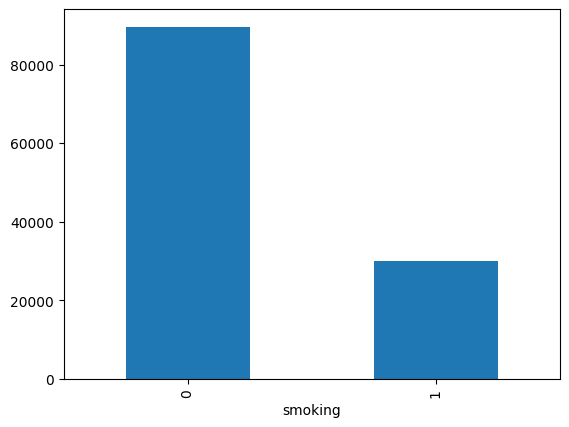

In [10]:
data['smoking'].value_counts().plot.bar()

In [11]:
X, Y = data.drop(columns=['smoking']), data['smoking']

In [12]:
from xgboost import cv, DMatrix, plot_importance, XGBClassifier

data_dmatrix = DMatrix(data=X, label=Y)

In [13]:
data_dmatrix

In [14]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.7,'learning_rate': 0.01,'max_depth': 3}

In [15]:
cv_results = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

In [16]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.762814,0.001341,0.761684,0.003257
1,0.809158,0.000776,0.808565,0.002870
2,0.819185,0.000605,0.818518,0.003312
3,0.816545,0.001092,0.815685,0.003248
4,0.821804,0.001016,0.821063,0.002823
5,0.826072,0.000901,0.825293,0.002565
6,0.828231,0.000772,0.827465,0.002496
7,0.828340,0.000763,0.827650,0.002432
8,0.828203,0.000577,0.827436,0.002373
9,0.827896,0.000553,0.827071,0.002320


In [17]:
xgb_clf = XGBClassifier(**params)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
xgb_clf.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

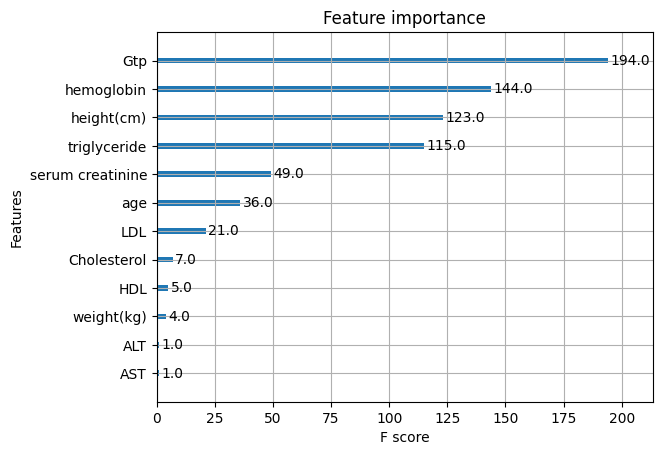

In [20]:
plot_importance(xgb_clf)

# GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
parameters = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 700],
    'learning_rate': [0.1, 0.01, 0.05]
}

In [23]:
estimator = XGBClassifier(objective="binary:logistic",use_label_encoder=False)

In [24]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='roc_auc',
    n_jobs=1,
    cv=10,
    verbose=0
)

In [25]:
grid_search.fit(X, Y)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 300, 700]},
             scoring='roc_auc')

In [26]:
grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=700, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
cv = KFold(5)

In [28]:
predictions = cross_val_predict(grid_search.best_estimator_, X, Y, cv=cv)

In [29]:
f1_score(Y, predictions, average='weighted')

0.6501616642948292

<Axes: >

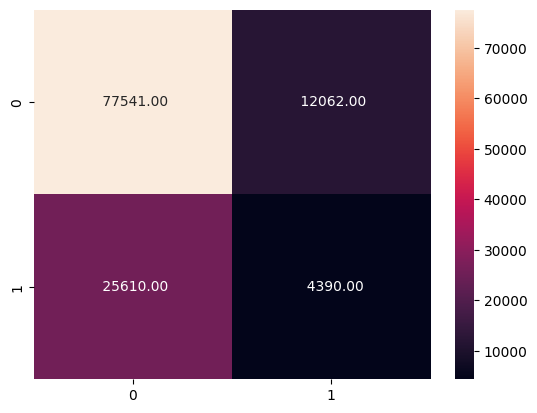

In [30]:
sns.heatmap(confusion_matrix(Y, predictions), annot=True, fmt='9.2f')


# Decision Tree

In [31]:
cv = KFold(5)

In [32]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": range(2, 6),
    "min_samples_split": range(20, 50, 5),
}

In [33]:
results = []
for criterion in params['criterion']:
  for max_depth in params['max_depth']:
    for min_samples in params['min_samples_split']:
      clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples)
      predictions = cross_val_predict(clf, X, Y, cv=cv)
      node = {
          "model": clf,
          "score": f1_score(Y, predictions, average='weighted')
      }
      results.append(node)

In [34]:
results.sort(key=lambda x: x['score'], reverse=True)

In [35]:
best_model = results[0]['model']

In [36]:
predictions = cross_val_predict(best_model, X, Y, cv=cv)

In [37]:
f1_score(Y, predictions, average='weighted')

0.6257606676890797

<Axes: >

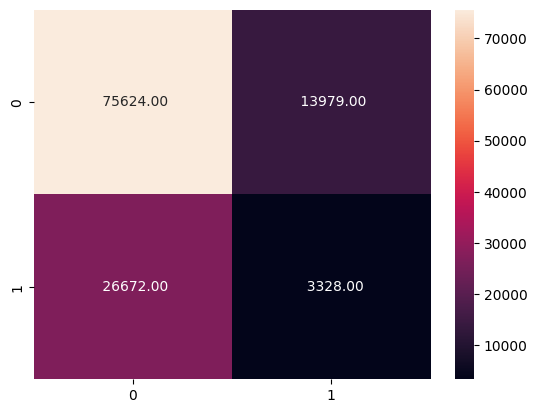

In [38]:
sns.heatmap(confusion_matrix(Y, predictions), annot=True, fmt='9.2f')